In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("car_prices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


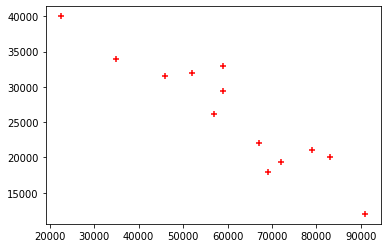

In [3]:
%matplotlib inline
plt.scatter(df.Mileage, df['Sell Price($)'], color='red', marker='+')

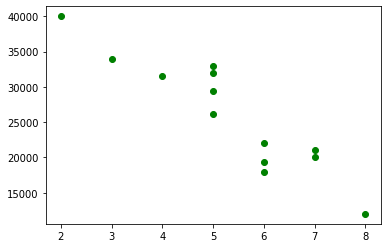

In [4]:
%matplotlib inline
plt.scatter(df['Age(yrs)'], df['Sell Price($)'], color='green')

<p>From the graph we can see that there is an approximate linear dependence of price, So we can apply linear model</p>

<snap style="color:lightgreen; font-size:20px">
<b><i>Solving the problem of Nominal attributes Using Pandas dummy variables</i></b>
</span>

In [5]:
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [6]:
df1 = pd.concat([df,dummies], axis='columns')
df1

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [7]:
df1 = df1.drop(['Car Model', 'Mercedez Benz C class'], axis='columns')
df1

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [8]:
x1_train = df1[['Mileage','Age(yrs)','Audi A5','BMW X5']].values
x1_train

array([[69000,     6,     0,     1],
       [35000,     3,     0,     1],
       [57000,     5,     0,     1],
       [22500,     2,     0,     1],
       [46000,     4,     0,     1],
       [59000,     5,     1,     0],
       [52000,     5,     1,     0],
       [72000,     6,     1,     0],
       [91000,     8,     1,     0],
       [67000,     6,     0,     0],
       [83000,     7,     0,     0],
       [79000,     7,     0,     0],
       [59000,     5,     0,     0]], dtype=int64)

In [9]:
y1_train = df['Sell Price($)'].values
y1_train

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=int64)

In [10]:
from sklearn import linear_model

reg1_model = linear_model.LinearRegression()

reg1_model.fit(x1_train, y1_train)

LinearRegression()

In [11]:
#Model Accuracy(Score)
reg1_model.score(x1_train,y1_train)

0.9417050937281082

In [12]:
reg1_model.coef_

array([-3.70122094e-01, -1.33245363e+03, -2.45354074e+03, -6.73820733e+03])

In [13]:
reg1_model.intercept_

58976.625968537235

In [14]:
#Predict price of a mercedez benz that is 4 yr old with mileage 45000
reg1_model.predict([[45000,4,0,0]])

array([36991.31721061])

In [15]:
#Predict price of a BMW X5 that is 7 yr old with mileage 86000
reg1_model.predict([[86000,7,0,1]])

array([11080.74313219])

<snap style="color:lightgreen; font-size:20px">
<b><i>Solving the problem of Nominal attributes Using Sklearn's OneHotEncoder</i></b>
</span>

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [17]:
df2 = df
df2['Car Model'] = le.fit_transform(df2['Car Model'])
df2

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [18]:
x2_train=df2[['Car Model', 'Mileage', 'Age(yrs)']].values
x2_train

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [19]:
y2_train=df2['Sell Price($)'].values
y2_train

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=int64)

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('Car Model',OneHotEncoder(), [0])], remainder = 'passthrough')

In [21]:

x2_train = ct.fit_transform(x2_train)
x2_train


array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [22]:
#x2_train=x2_train[:,1:]
x2_train = np.delete(x2_train, 2, axis=1)
x2_train

array([[0.00e+00, 1.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00]])

In [23]:
reg2_model = linear_model.LinearRegression()

reg2_model.fit(x2_train,y2_train)

LinearRegression()

In [24]:
reg2_model.score(x2_train,y2_train)

0.9417050937281082

In [25]:
reg2_model.coef_

array([-2.45354074e+03, -6.73820733e+03, -3.70122094e-01, -1.33245363e+03])

In [26]:
reg2_model.intercept_

58976.625968552275

In [27]:
#Predict price of a mercedez benz that is 4 yr old with mileage 45000
reg1_model.predict([[0,0,45000,4]])

array([-1.10377309e+08])

In [28]:
#Predict price of a BMW X5 that is 7 yr old with mileage 86000
reg1_model.predict([[0,1,86000,7]])

array([-2.10994027e+08])